In [19]:
!python -m pip install --upgrade pip

DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/protobuf-6.30.2-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/python_slugify-8.0.4-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/sindy_baquero-0.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/kaggle-1.7.4.2-py

In [5]:
!pip install kagglehub[pandas-datasets]>=0.3.8 geopy

DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/protobuf-6.30.2-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/python_slugify-8.0.4-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/sindy_baquero-0.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/kaggle-1.7.4.2-py

In [6]:
import kagglehub
import zipfile
import os
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

/home/codespace/.local/lib/python3.12/site-packages/tqdm-4.67.1-py3.12.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
class Pad_clase:
    def __init__(self):
        pass

    def download_dataset_zip(self,url = ""):
        print("Descargando dataset desde Kaggle...")
        dataset_path = kagglehub.dataset_download(url)
        print("Ruta al dataset:", dataset_path)
        return dataset_path

    def extract_zip_files(self,dataset_path):
        zip_files = [f for f in os.listdir(dataset_path) if f.endswith('.zip')]
        if zip_files:
            zip_file = os.path.join(dataset_path, zip_files[0])
            extract_dir = os.path.join(dataset_path, "extracted")
            os.makedirs(extract_dir, exist_ok=True)
            print(f"Extrayendo {zip_file} en {extract_dir}...")
            with zipfile.ZipFile(zip_file, "r") as z:
                z.extractall(extract_dir)
            return extract_dir
        else:
            # Si no se encuentra un ZIP, se verifica si existen archivos CSV en la ruta
            csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
            if csv_files:
                print("No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.")
                return dataset_path
            else:
                raise FileNotFoundError("No se encontró ningún archivo .zip ni archivos .csv en la ruta del dataset")

    def create_csv(self,csv_dir):
        #os.makedirs('src/static/csv', exist_ok=True)
        csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
        if not csv_files:
            raise FileNotFoundError("No se encontraron archivos CSV en el directorio extraído")

        for file in csv_files:
            file_path = os.path.join(csv_dir, file)
            print(f"Leyendo {file_path}...")
            try:
                df = pd.read_csv(file_path, encoding="latin1")
            except Exception as e:
                print(f"Error al leer {file}: {e}")
                continue
            print(f"Creando/actualizando ")
        print("cvs creado correctamente en ")
        return df

    def columna_regex(self,df_datos =pd.DataFrame(), reg = r"",columna ="",n_columnas = []):
        df = df_datos.copy()
        df[n_columnas] = df[columna].str.extract(reg).astype(int)
        return df

    def limpieza_nan_null(self,df_datos =pd.DataFrame(), name_col="", reemplezar=""):
        if df_datos[name_col].isnull().sum()>0:
            df = df_datos.copy()
            df[name_col]=df[name_col].fillna(reemplezar)
            print("cantidad antes {}/{}  despues {}/{} ".format(df_datos[name_col].isnull().sum(),len(df_datos),df[name_col].isnull().sum(),len(df)))
            return df
        print("no hay nulos")
        return df_datos
            #df_n["Company Profile"]=df_n["Company Profile"].fillna('{"Sector":"","Industry":""}')

In [8]:
padclase = Pad_clase()
dataset_path = padclase.download_dataset_zip("oscardavidperilla/domestic-violence-in-colombia")
csv_dir = padclase.extract_zip_files(dataset_path)
df = padclase.create_csv(csv_dir)

Descargando dataset desde Kaggle...


100%|██████████| 3.02M/3.02M [00:00<00:00, 51.7MB/s]

Extracting files...
Ruta al dataset: /home/codespace/.cache/kagglehub/datasets/oscardavidperilla/domestic-violence-in-colombia/versions/1
No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.
Leyendo /home/codespace/.cache/kagglehub/datasets/oscardavidperilla/domestic-violence-in-colombia/versions/1/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv...


Creando/actualizando 
cvs creado correctamente en 


/tmp/ipykernel_5113/2414538749.py:40: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding="latin1")


In [3]:
%pip install matplotlib

DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/protobuf-6.30.2-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/python_slugify-8.0.4-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/sindy_baquero-0.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/kaggle-1.7.4.2-py

In [9]:
df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÃNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÃ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÃ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÃ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÃ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


realizar limpieza (Nulos o NaNs o Vacios , Caracteres espaciales)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476970 non-null  object
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


In [11]:
df.describe()

,CANTIDAD
count,476970.000000
mean,1.707764
std,3.338647
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,130.000000


In [12]:
df.isnull().sum()

DEPARTAMENTO       0
MUNICIPIO          0
CODIGO DANE        0
ARMAS MEDIOS       2
FECHA HECHO        0
GENERO             3
GRUPO ETARIO    1615
CANTIDAD           0
dtype: int64

In [13]:
data=df.copy()
data['ARMAS MEDIOS'].fillna(data['ARMAS MEDIOS'].mode()[0], inplace = True)
data['GENERO'].fillna(data['GENERO'].mode()[0], inplace = True)
data['GRUPO ETARIO'].fillna(data['GRUPO ETARIO'].mode()[0], inplace = True)
data['CODIGO DANE'].fillna(data['CODIGO DANE'].mode()[0], inplace = True)

/tmp/ipykernel_5113/814495732.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ARMAS MEDIOS'].fillna(data['ARMAS MEDIOS'].mode()[0], inplace = True)
/tmp/ipykernel_5113/814495732.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [14]:
data.isnull().sum()

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO DANE     0
ARMAS MEDIOS    0
FECHA HECHO     0
GENERO          0
GRUPO ETARIO    0
CANTIDAD        0
dtype: int64

In [15]:
data

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÃNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÃ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÃ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÃ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÃ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
476965,VICHADA,SANTA ROSALÃA,99624000,SIN EMPLEO DE ARMAS,44250,FEMENINO,MENORES,1
476966,VICHADA,SANTA ROSALÃA,99624000,SIN EMPLEO DE ARMAS,44262,FEMENINO,ADULTOS,1
476967,VICHADA,SANTA ROSALÃA,99624000,SIN EMPLEO DE ARMAS,44300,FEMENINO,ADULTOS,1
476968,CUNDINAMARCA,TAUSA,25793000,CONTUNDENTES,44294,FEMENINO,ADULTOS,1


Analisis.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
%pip install seaborn

DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/protobuf-6.30.2-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/python_slugify-8.0.4-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/sindy_baquero-0.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/codespace/.local/lib/python3.12/site-packages/kaggle-1.7.4.2-py

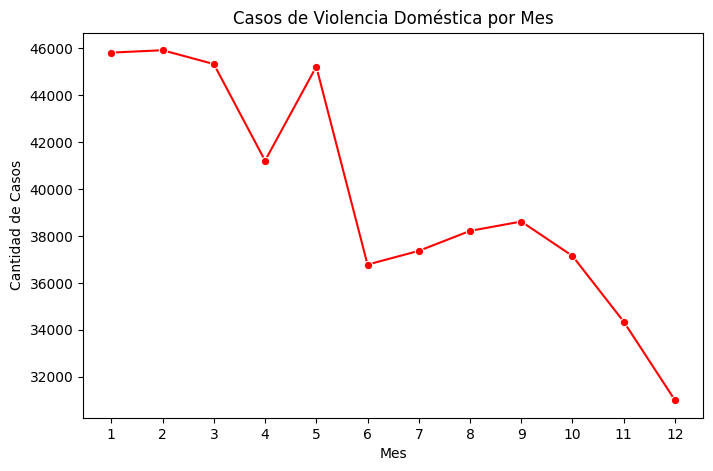

In [18]:
# Hipótesis: en diciembre hay más casos de violencia doméstica?
df["FECHA HECHO"] = pd.to_datetime(df["FECHA HECHO"], format="%d/%m/%Y", dayfirst=True, errors='coerce')
df = df.dropna(subset=["FECHA HECHO"])
df["AÑO"] = df["FECHA HECHO"].dt.year
df["MES"] = df["FECHA HECHO"].dt.month
casos_por_mes = df["MES"].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.lineplot(x=casos_por_mes.index, y=casos_por_mes.values, marker="o", color="red")
plt.xticks(range(1,13))
plt.title("Casos de Violencia Doméstica por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Casos")
plt.show()

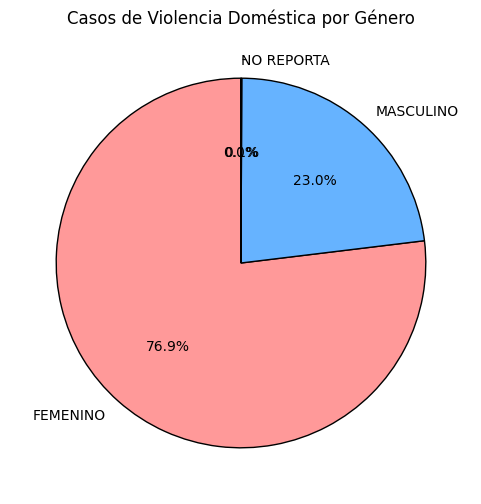

In [20]:
#Hipótesis : La violencia doméstica afecta más a mujeres que a hombres?
casos_por_genero = df["GENERO"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(casos_por_genero.values, labels=casos_por_genero.index, autopct="%.1f%%", colors=["#ff9999", "#66b3ff"], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Casos de Violencia Doméstica por Género")
plt.show()

/tmp/ipykernel_5113/1356145016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"], y=casos_por_dia.values, palette="Blues_r")


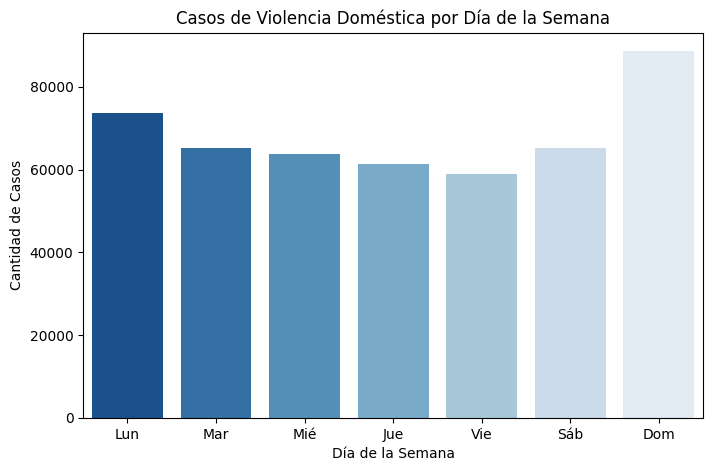

In [21]:
#Hipótesis: En los fines de semana hay más casos que en días laborales.
df["DIA SEMANA"] = df["FECHA HECHO"].dt.dayofweek  # 0 = Lunes, 6 = Domingo
casos_por_dia = df["DIA SEMANA"].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"], y=casos_por_dia.values, palette="Blues_r")
plt.title("Casos de Violencia Doméstica por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Cantidad de Casos")
plt.show()

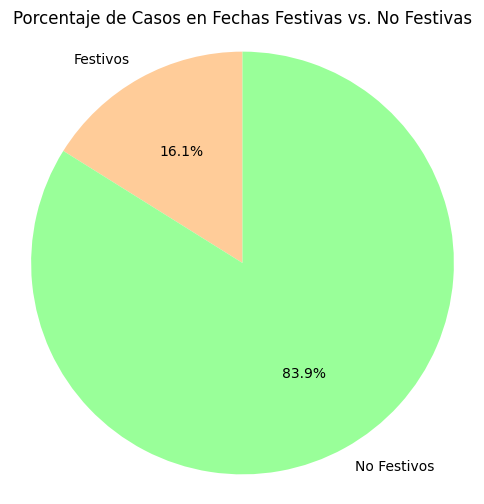

In [22]:
# Hipótesis: Violencia doméstica en fechas festivas
festivos = [1, 12]  # Enero y Diciembre
casos_festivos = df[df["MES"].isin(festivos)]
casos_no_festivos = df[~df["MES"].isin(festivos)]

plt.figure(figsize=(6,6))
plt.pie([len(casos_festivos), len(casos_no_festivos)], labels=["Festivos", "No Festivos"], autopct="%1.1f%%", colors=["#ffcc99", "#99ff99"], startangle=90)
plt.title("Porcentaje de Casos en Fechas Festivas vs. No Festivas")
plt.axis("equal")
plt.show()

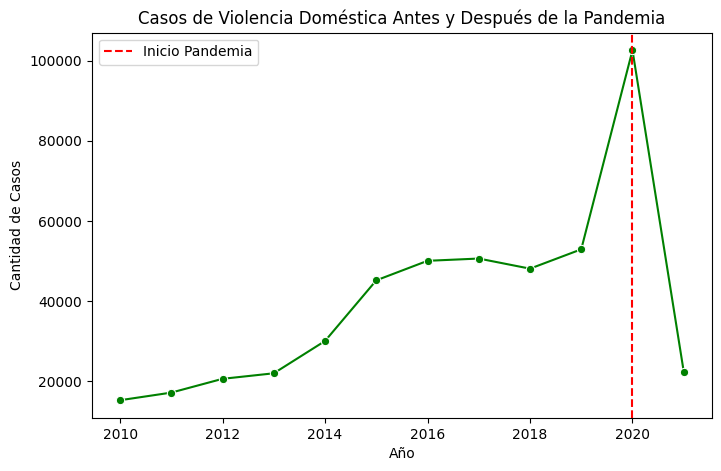

In [23]:
# Hipótesis: Casos antes y después de la pandemia
df["AÑO"] = df["FECHA HECHO"].dt.year
casos_por_año = df["AÑO"].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.lineplot(x=casos_por_año.index, y=casos_por_año.values, marker="o", color="green")
plt.axvline(x=2020, color='red', linestyle='--', label='Inicio Pandemia')
plt.title("Casos de Violencia Doméstica Antes y Después de la Pandemia")
plt.xlabel("Año")
plt.ylabel("Cantidad de Casos")
plt.legend()
plt.show()

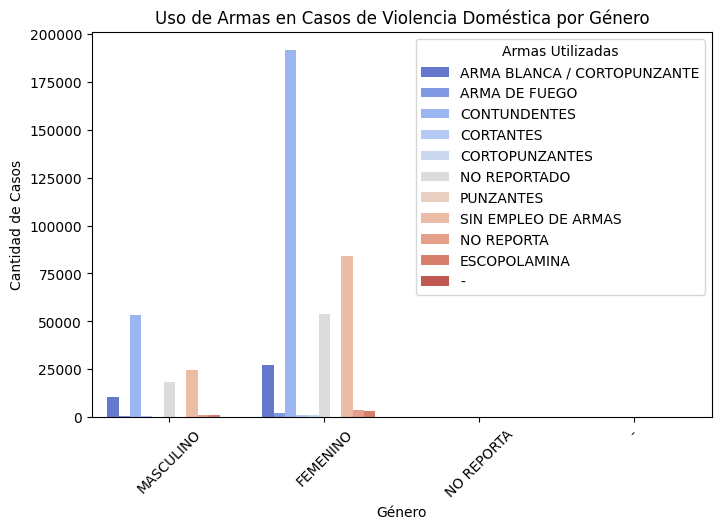

In [24]:
# Hipótesis: Uso de armas según género
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="GENERO", hue="ARMAS MEDIOS", palette="coolwarm")
plt.title("Uso de Armas en Casos de Violencia Doméstica por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Casos")
plt.xticks(rotation=45)
plt.legend(title="Armas Utilizadas")

/tmp/ipykernel_5113/3871782678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos_por_edad.index, y=casos_por_edad.values, palette="viridis")


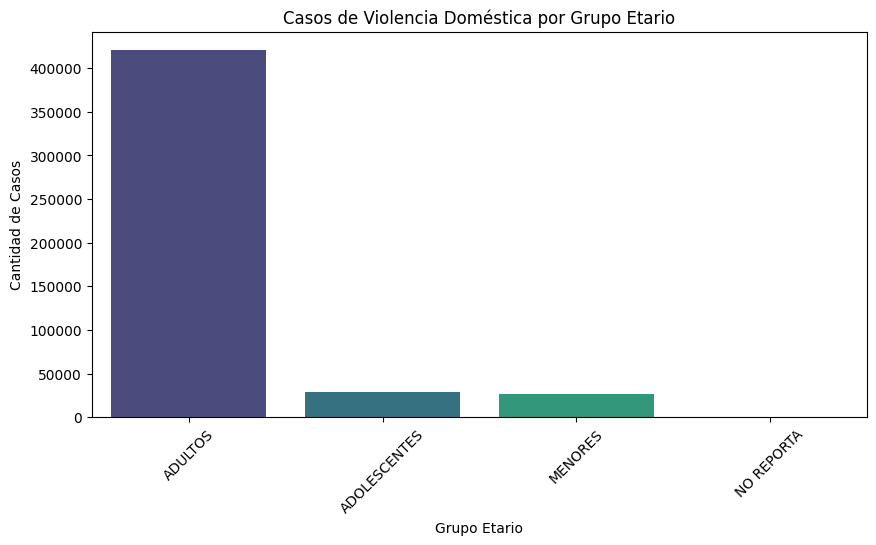

In [25]:
# Hipótesis: Casos por grupo etario
casos_por_edad = df["GRUPO ETARIO"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=casos_por_edad.index, y=casos_por_edad.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Casos de Violencia Doméstica por Grupo Etario")
plt.xlabel("Grupo Etario")
plt.ylabel("Cantidad de Casos")
plt.show()